In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
train=pd.read_csv('train (1).csv')
test=pd.read_csv('test (1).csv')
n_train = train.shape[0]
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [79]:
all_data =pd.concat([train,test], axis = 0, ignore_index=True)

In [80]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [81]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:>

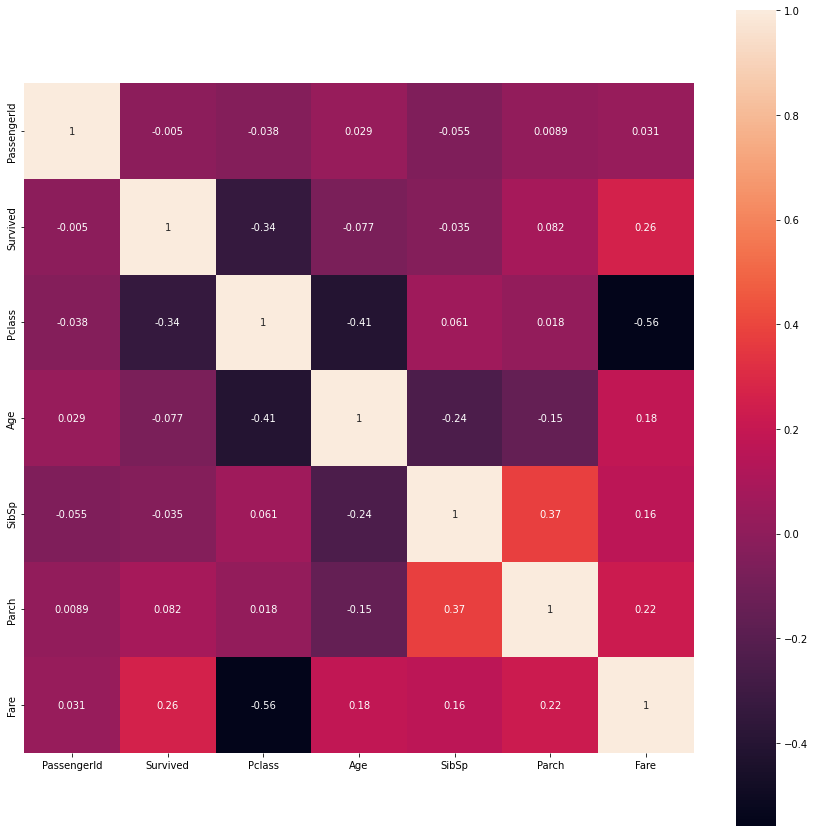

In [82]:
cor_map = all_data.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(cor_map, square = True, annot = True)

In [83]:
cols = cor_map.nlargest(6, 'Survived')['Survived'].index
cols

Index(['Survived', 'Fare', 'Parch', 'PassengerId', 'SibSp', 'Age'], dtype='object')

In [84]:
cols = ['Fare', 'Parch', 'SibSp', 'Age']

In [85]:
sub = pd.concat((all_data['Fare'], all_data['Survived']), axis = 1)
X = all_data[:n_train]
X['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [86]:
Fare_Mean = X['Fare'].mean()
Fare_Std = X['Fare'].std()
X = X[X['Fare'] < Fare_Mean + 3 * Fare_Std]
X['Fare'].describe()
n_train_1 = X.shape[0]
all_data = pd.concat((X, all_data[n_train:]), axis = 0)
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

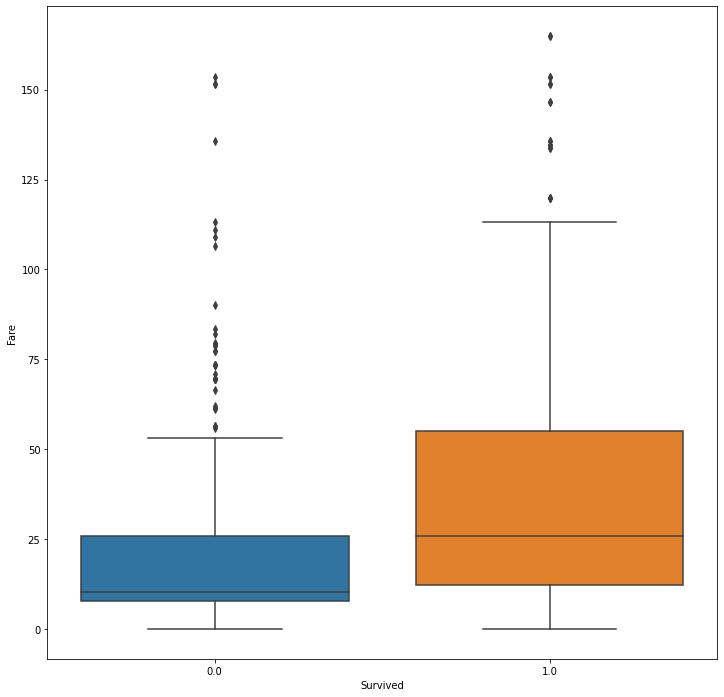

In [87]:
sub = pd.concat((all_data['Fare'], all_data['Survived']), axis = 1)
fig2, ax2 = plt.subplots(figsize = (12,12))
sns.boxplot(y = sub['Fare'], x = sub['Survived'], data = sub)

<AxesSubplot:xlabel='Parch', ylabel='Count'>

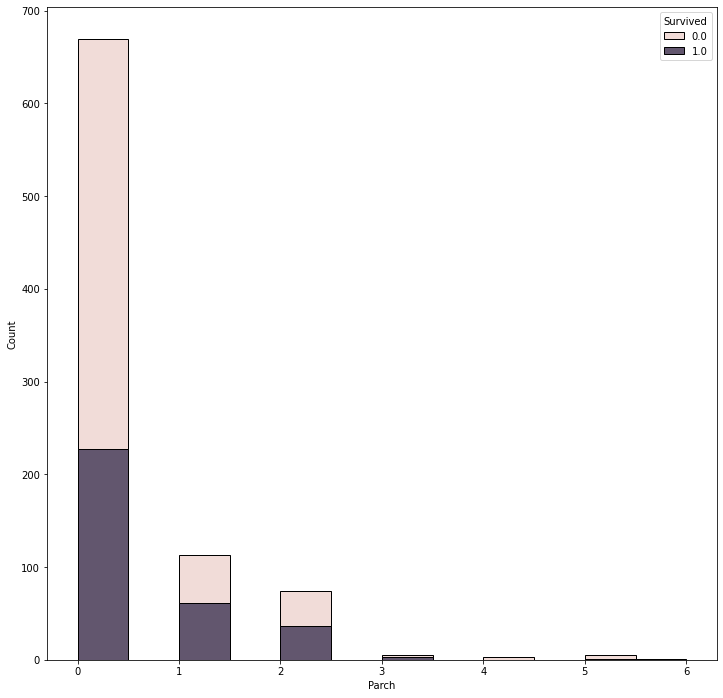

In [88]:
sub = pd.concat((all_data['Parch'], all_data['Survived']), axis = 1)
fig3, ax3 = plt.subplots(figsize = (12,12))
sns.histplot(binwidth = 0.5, x = 'Parch', data = sub, hue = 'Survived', stat = 'count', multiple="stack")

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

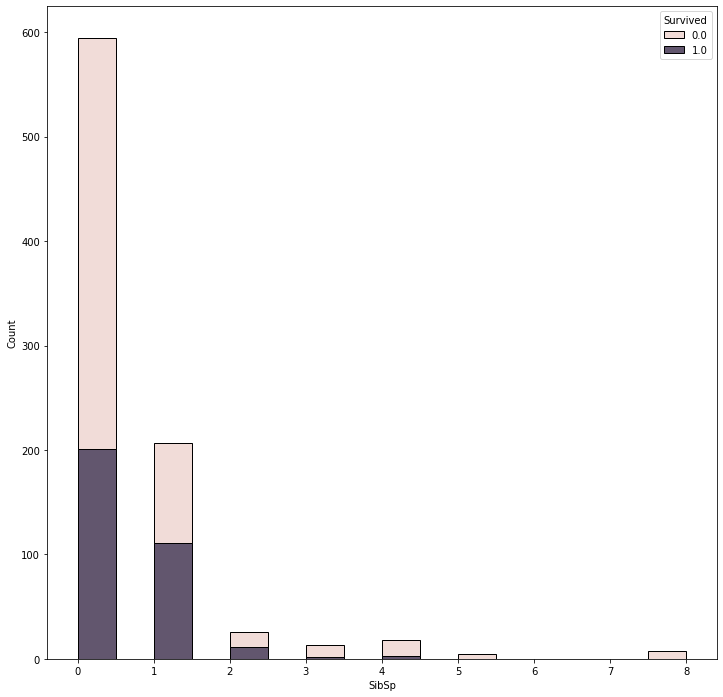

In [89]:
sub = pd.concat((all_data['SibSp'], all_data['Survived']), axis = 1)
fig4, ax4 = plt.subplots(figsize = (12,12))
sns.histplot(binwidth = 0.5, x = 'SibSp', data = sub, hue = 'Survived', stat = 'count', multiple="stack")

In [90]:
cols = cor_map.nlargest(8, 'Survived')['Survived'].index
cols

Index(['Survived', 'Fare', 'Parch', 'PassengerId', 'SibSp', 'Age', 'Pclass'], dtype='object')

In [91]:
cols = ['Fare', 'Age', 'Pclass']

<AxesSubplot:xlabel='Survived', ylabel='Age'>

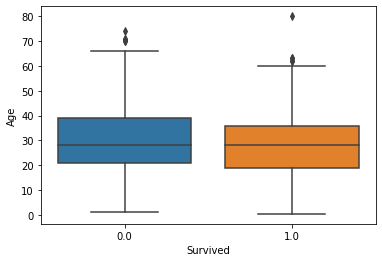

In [92]:
sub = pd.concat((all_data['Age'], all_data['Survived']), axis = 1)
sns.boxplot(x = sub['Survived'], y = sub['Age'], data = sub)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

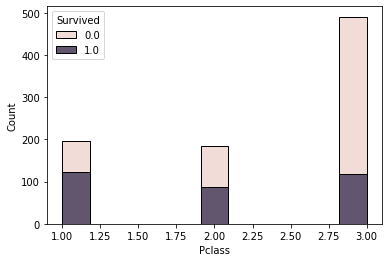

In [93]:
sub = pd.concat((all_data['Pclass'], all_data['Survived']), axis = 1)
sns.histplot(x = 'Pclass', stat = 'count', hue = 'Survived', data = sub, multiple="stack")

In [94]:
from sklearn.impute import SimpleImputer
Imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X = pd.concat((all_data[cols], all_data['Survived']), axis = 1)
Imp.fit(X)
X = Imp.transform(X)

In [95]:
X_train = X[:n_train_1,:-1]
Y_train = X[:n_train_1, -1]
X_test = X[n_train_1:,:-1]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [96]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
def root_mse(model):
    kf = KFold(n_splits=5, shuffle = True, random_state=30)
    score = []
    for train_ix, test_ix in kf.split(X_train, Y_train):
        model.fit(X_train[train_ix], Y_train[train_ix])
        score.append(accuracy_score(model.predict(X_train[test_ix]), Y_train[test_ix]))
    acc_score = np.mean(score)
    print(f"The {model}'s accuracy on the training set is: {acc_score}")

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import  GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
Lr = LogisticRegression()
KNC = KNeighborsClassifier(n_neighbors=2)
SVC = SVC(kernel='linear')
NBC = GaussianNB()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()

for model in [Lr, KNC, NBC, DTC, RFC]:
    root_mse(model)

The LogisticRegression()'s accuracy on the training set is: 0.7014975369458127
The KNeighborsClassifier(n_neighbors=2)'s accuracy on the training set is: 0.679704433497537
The GaussianNB()'s accuracy on the training set is: 0.6716453201970444
The DecisionTreeClassifier()'s accuracy on the training set is: 0.6693661740558292
The RandomForestClassifier()'s accuracy on the training set is: 0.693471264367816


In [101]:
model = Lr
model.fit(X_train, Y_train)
cm = confusion_matrix(model.predict(X_train), Y_train)

In [102]:
prediction = model.predict(X_test)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.